LIBRARY

In [1]:
import numpy as np
import pandas as pd
import requests
import sys
import bs4
import re
import urllib.request
import itertools
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
search_url = "https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={page}"

In [3]:
def get_lotto_num(page):
    response = urllib.request.urlopen(search_url.format(page=page))
    lotto_data = response.read()
    soup = bs4.BeautifulSoup(lotto_data)
    ret = []
    newret = []
    for winnums in soup.findAll('div', attrs={'class': 'nums'}):
        winnum = winnums.findAll('span')
        ret.append(winnum)
    ret = ret[0]
    for i in ret:
        string = str(i)
        onlynum =  re.sub('<.+?>','', string, 0, re.I|re.S)
        newret.append(onlynum)
        newret = list(map(int, newret))
    return newret

all lotto success num

In [4]:
return_list=[]
for i in range(1,907):
    return_list.append(get_lotto_num(i))

In [5]:
all_num = list(itertools.chain(*return_list))
all_num= pd.DataFrame(all_num,columns=["num"])
dict_result = Counter(all_num.num)
df = pd.DataFrame.from_dict(dict_result, orient='index').reset_index().sort_values("index").reset_index(drop=True)
df.rename(columns = {'index' : 'num',0:"count_num"}, inplace = True)

In [6]:
# threshold  of likely or unlikely 
threshold = (900 * 7)/45
(900 * 7)/45

140.0

In [7]:
900 * 7

6300

In [8]:
df["Unlikely"] = list(map(int,df.count_num<=139.5))

plotting

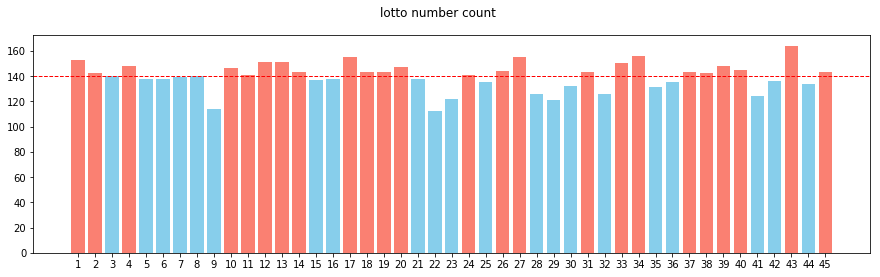

In [10]:
from matplotlib import pyplot as plt

t1 = df[df['count_num']>140]
t2 = df[df['count_num']<=140]

plt.rcParams["figure.figsize"] = (15,4)
y = df.count_num
x = df.num

plt.bar(t1.num, t1['count_num'], color='salmon')
plt.bar(t2.num, t2['count_num'], color='skyblue')
plt.axhline(y=threshold,linewidth=1, color='red' ,linestyle='--' )

# plt.bar(x, y, width=0.7)
plt.xticks (x)
plt.suptitle("lotto number count")
plt.show()